In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def pretty_data(data):
    try:
        result = int(data)
        return result
    except:
        try:
            result = float(data)
            return result
        except:
            try:
                result = int(data.replace('$', '').replace('€', '').replace('£', '').replace(' ', ''))
                return result
            except:
                result = data
                return result

                 Название        Название в оригинале   Год  \
0             Оппенгеймер                 Oppenheimer  2023   
2       Бедные-несчастные                 Poor Things  2023   
5   Убийцы цветочной луны  Killers of the Flower Moon  2023   
8                   Барби                      Barbie  2023   
10      Аватар: Путь воды    Avatar: The Way of Water  2022   

    Продолжительность    Страна        Жанр         Режиссер  Рейтинг  \
0                 180       США   биография  Кристофер Нолан        8   
2                 141  Ирландия       драма  Йоргос Лантимос        7   
5                 206       США       драма  Мартин Скорсезе        7   
8                 114       США     комедия     Грета Гервиг        6   
10                192       США  фантастика   Джеймс Кэмерон        7   

    Бюджет($)  Сборы в США($)  Сборы в мире($)     Прибыль  
0   100000000       329862540        972444774   872444774  
2    35000000        34553225        117463328    82463328  

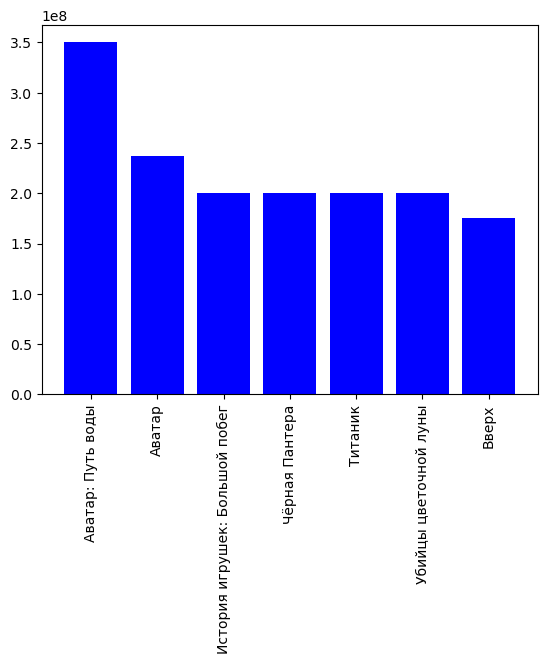

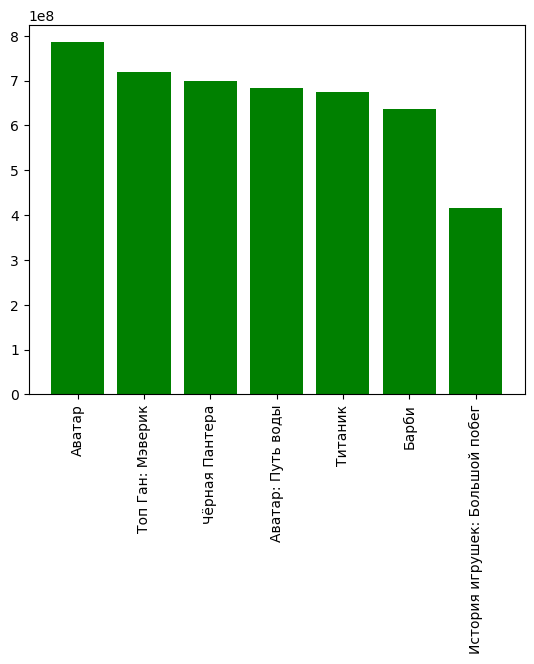

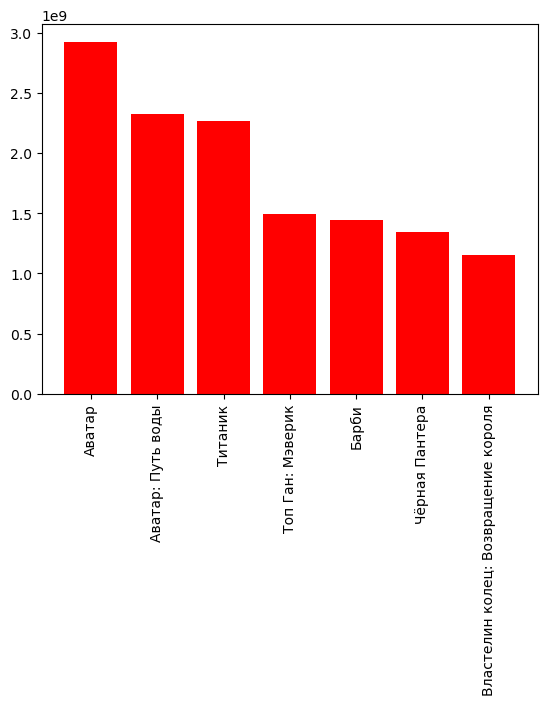

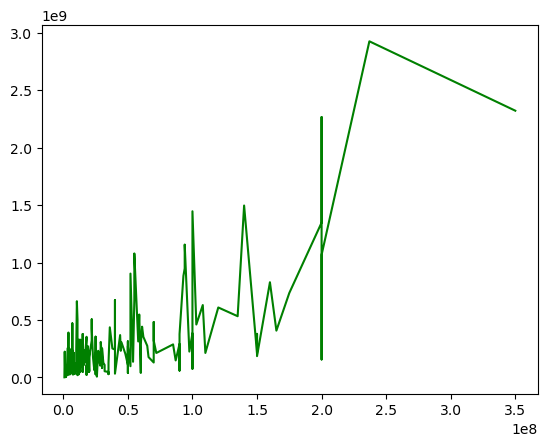

In [3]:
df = pd.read_csv('df_результат_парсинга_1.csv')
df_budget = pd.read_csv('df_результат_парсинга_2_(с пустотами).csv')

df_merged = df.merge(df_budget, how='left', on='Название').drop('Ссылка', axis=1)

df_merged.dropna(inplace=True)

df_merged = df_merged.map(pretty_data, na_action='ignore')
df_merged['Прибыль'] = df_merged['Сборы в мире($)'] - df_merged['Бюджет($)']

print(df_merged.head())

# with open('index_temp.html', 'w', encoding='utf-8') as f:
#     f.write(df_merged.to_html())

top_budget = df_merged.sort_values(by='Бюджет($)', ascending=False).head(7)
top_profit_usa = df_merged.sort_values(by='Сборы в США($)', ascending=False).head(7)
top_profit_world = df_merged.sort_values(by='Сборы в мире($)', ascending=False).head(7)

df_budget_profit = df_merged.sort_values(by='Бюджет($)')[['Бюджет($)', 'Сборы в мире($)']]

plt.xticks(rotation=90)
plt.bar(top_budget['Название'], top_budget['Бюджет($)'], color='b')
plt.show()
plt.xticks(rotation=90)
plt.bar(top_profit_usa['Название'], top_profit_usa['Сборы в США($)'], color='g')
plt.show()
plt.xticks(rotation=90)
plt.bar(top_profit_world['Название'], top_profit_world['Сборы в мире($)'], color='r')
plt.show()

plt.plot(df_budget_profit['Бюджет($)'], df_budget_profit['Сборы в мире($)'], color='g')
plt.show()

*Подписать оси, масштаб значений?*

